In [1]:
import pandas as pd

In [2]:
costos_rendimiento_file = '../data/original/SEFADER_20241202_104833.csv' 
tecnicos_file = '../data/inputs/relacion_tecnicos_programa_version_noviembre.csv'

In [3]:
costos_rendimiento = pd.read_csv(costos_rendimiento_file)

In [4]:
tec = pd.read_csv(tecnicos_file)

In [5]:
costos_rendimiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Bitácora registrada por                         933 non-null    object 
 1   NomUsuario                                      933 non-null    object 
 2   ID_Bitacora                                     933 non-null    object 
 3   Fecha de creación (bitácora)                    933 non-null    object 
 4   Tipo de bitácora                                933 non-null    object 
 5   Año-ciclo-bitácora                              933 non-null    object 
 6   Régimen hídrico                                 933 non-null    object 
 7   Id_Cultivos                                     933 non-null    object 
 8   Tipo de superficie                              932 non-null    object 
 9   Cultivo 1                                  

In [6]:
costos_rendimiento.head(3)

,Bitácora registrada por,NomUsuario,ID_Bitacora,Fecha de creación (bitácora),Tipo de bitácora,Año-ciclo-bitácora,Régimen hídrico,Id_Cultivos,Tipo de superficie,Cultivo 1,...,18_Gastos indirectos,19_Labores culturales,Costo acumulado,Ingresos_totales,ID_Productividad,C1P1-¿Cuántos productos cosecho del cultivo 1?,Tipo de semilla C1,C1P2-Producto obtenido,C1P2-Rendimiento real (Unidad/ha),C1P2-Unidad de medida
0,ROMALDA VÁSQUEZ GUTIÉRREZ,ROMALDAVASQUEZ_PSUR,BITAG-2023-0518-0345-QVLH6-MIDXQ,2023-05-18 15:45:34,MODULO,PV_2024,TEMPORAL,CULTV-2023-0518-0401-P7XPM-NAW9I,INNOVACION,MAIZ,...,NaN,NaN,14570.0,NaN,NaN,NaN,CRIOLLA,NaN,NaN,NaN
1,ROMALDA VÁSQUEZ GUTIÉRREZ,ROMALDAVASQUEZ_PSUR,BITAG-2023-0518-0345-QVLH6-MIDXQ,2023-05-18 15:45:34,MODULO,PV_2024,TEMPORAL,CULTV-2023-0518-0408-C01F9-EOROE,TESTIGO,MAIZ,...,NaN,NaN,170.0,NaN,NaN,NaN,CRIOLLA,NaN,NaN,NaN
2,OSCAR URIEL VILLALOBOS BLAS,OSCARVILLALOBOS_PSUR,BITAG-2023-0619-0113-CXJRG-UQOXG,2023-06-19 13:13:01,AE,OI_2023_2024,RIEGO,CULTV-2023-0619-0115-T4GCE-ZRBSM,INNOVACION,MAIZ,...,NaN,1200.0,20600.0,NaN,NaN,NaN,CRIOLLA,NaN,NaN,NaN


In [7]:
tec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Bitacora.registrada.por  239 non-null    object
 1   NOMBRE DEL USUARIO       239 non-null    object
 2   id                       239 non-null    object
 3   user_name                239 non-null    object
 4   first_name               239 non-null    object
 5   last_name                239 non-null    object
 6   full_name_tec            239 non-null    object
 7   Nombre del técnico       175 non-null    object
 8   Programa                 195 non-null    object
 9   Región de atención       205 non-null    object
 10  respuesta_hub            44 non-null     object
dtypes: object(11)
memory usage: 20.7+ KB


In [8]:
tec.head(3)

,Bitacora.registrada.por,NOMBRE DEL USUARIO,id,user_name,first_name,last_name,full_name_tec,Nombre del técnico,Programa,Región de atención,respuesta_hub
0,AbrahamTejeda_PSUR,Abraham Tejeda Galmich,users-2023-0724-1048-KAgLB-hfT0v,AbrahamTejeda_PSUR,Abraham,Tejeda Galmich,Abraham Tejeda Galmich,Abraham Tejeda Galmich,Abasto Seguro de Maíz,Costa,NaN
1,AidaLopez_PSUR,Aida López Cruz,users-2023-0601-1113-PJSxf-jigpv,AidaLopez_PSUR,Aida,López Cruz,Aida López Cruz,Aida López Cruz,Autosuficiencia Alimentaria,Mixteca,NaN
2,AlbyMerecias_PSUR,Alby Merecias Cruz,users-2023-0601-1111-TkEGA-QH4Vz,AlbyMerecias_PSUR,Alby,Merecias Cruz,Alby Merecias Cruz,Alby Merecias Cruz,Autosuficiencia Alimentaria,Mixteca,NaN


In [9]:
tec['Bitacora.registrada.por'] = 	tec['Bitacora.registrada.por'].apply(lambda x: x.upper())

In [10]:
tec['Bitacora.registrada.por'].head(3)

0    ABRAHAMTEJEDA_PSUR
1        AIDALOPEZ_PSUR
2     ALBYMERECIAS_PSUR
Name: Bitacora.registrada.por, dtype: object

In [11]:
tec_2 = tec[['Bitacora.registrada.por','Región de atención','Programa']]

In [12]:
df = costos_rendimiento.merge(tec_2,left_on='NomUsuario',right_on='Bitacora.registrada.por',how='left')

In [13]:
tec_2.head(3)

,Bitacora.registrada.por,Región de atención,Programa
0,ABRAHAMTEJEDA_PSUR,Costa,Abasto Seguro de Maíz
1,AIDALOPEZ_PSUR,Mixteca,Autosuficiencia Alimentaria
2,ALBYMERECIAS_PSUR,Mixteca,Autosuficiencia Alimentaria


In [14]:
df.shape

(933, 41)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 41 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Bitácora registrada por                         933 non-null    object 
 1   NomUsuario                                      933 non-null    object 
 2   ID_Bitacora                                     933 non-null    object 
 3   Fecha de creación (bitácora)                    933 non-null    object 
 4   Tipo de bitácora                                933 non-null    object 
 5   Año-ciclo-bitácora                              933 non-null    object 
 6   Régimen hídrico                                 933 non-null    object 
 7   Id_Cultivos                                     933 non-null    object 
 8   Tipo de superficie                              932 non-null    object 
 9   Cultivo 1                                  

In [16]:
df.Programa.value_counts()

Programa
Autosuficiencia Alimentaria    589
Abasto Seguro de Maíz          305
Name: count, dtype: int64

In [17]:
df['Región de atención'].value_counts()

Región de atención
Mixteca             236
Valles Centrales    226
Cañada              109
Sierra Sur          108
Costa                98
Istmo                46
Papaloapan           44
Sierra Norte         28
Costa                 7
Name: count, dtype: int64

In [18]:
df[['Programa','Región de atención']].isnull().sum()

Programa              39
Región de atención    31
dtype: int64

In [19]:
df['Programa'].fillna('Sin Identificar',inplace=True)

/tmp/ipykernel_10729/1862162320.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Programa'].fillna('Sin Identificar',inplace=True)


In [20]:
df['Región de atención'].fillna('Sin Identificar',inplace=True)

/tmp/ipykernel_10729/607333566.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Región de atención'].fillna('Sin Identificar',inplace=True)


In [21]:
df.Programa.value_counts()

Programa
Autosuficiencia Alimentaria    589
Abasto Seguro de Maíz          305
Sin Identificar                 39
Name: count, dtype: int64

In [22]:
df['Región de atención'].value_counts()

Región de atención
Mixteca             236
Valles Centrales    226
Cañada              109
Sierra Sur          108
Costa                98
Istmo                46
Papaloapan           44
Sin Identificar      31
Sierra Norte         28
Costa                 7
Name: count, dtype: int64

In [23]:
import seaborn   as sns

In [24]:
df['Costo acumulado'].describe()

count    9.330000e+02
mean     1.308501e+05
std      3.535662e+06
min      0.000000e+00
25%      3.150000e+03
50%      7.080000e+03
75%      1.372000e+04
max      1.080027e+08
Name: Costo acumulado, dtype: float64

<Axes: xlabel='Costo acumulado', ylabel='Count'>

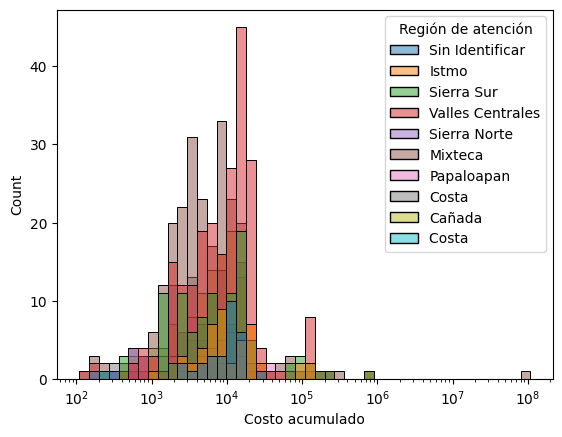

In [25]:
sns.histplot(df,x='Costo acumulado',hue='Región de atención',log_scale=True)

In [26]:
df.head(3)

,Bitácora registrada por,NomUsuario,ID_Bitacora,Fecha de creación (bitácora),Tipo de bitácora,Año-ciclo-bitácora,Régimen hídrico,Id_Cultivos,Tipo de superficie,Cultivo 1,...,Ingresos_totales,ID_Productividad,C1P1-¿Cuántos productos cosecho del cultivo 1?,Tipo de semilla C1,C1P2-Producto obtenido,C1P2-Rendimiento real (Unidad/ha),C1P2-Unidad de medida,Bitacora.registrada.por,Región de atención,Programa
0,ROMALDA VÁSQUEZ GUTIÉRREZ,ROMALDAVASQUEZ_PSUR,BITAG-2023-0518-0345-QVLH6-MIDXQ,2023-05-18 15:45:34,MODULO,PV_2024,TEMPORAL,CULTV-2023-0518-0401-P7XPM-NAW9I,INNOVACION,MAIZ,...,NaN,NaN,NaN,CRIOLLA,NaN,NaN,NaN,ROMALDAVASQUEZ_PSUR,Sin Identificar,Sin Identificar
1,ROMALDA VÁSQUEZ GUTIÉRREZ,ROMALDAVASQUEZ_PSUR,BITAG-2023-0518-0345-QVLH6-MIDXQ,2023-05-18 15:45:34,MODULO,PV_2024,TEMPORAL,CULTV-2023-0518-0408-C01F9-EOROE,TESTIGO,MAIZ,...,NaN,NaN,NaN,CRIOLLA,NaN,NaN,NaN,ROMALDAVASQUEZ_PSUR,Sin Identificar,Sin Identificar
2,OSCAR URIEL VILLALOBOS BLAS,OSCARVILLALOBOS_PSUR,BITAG-2023-0619-0113-CXJRG-UQOXG,2023-06-19 13:13:01,AE,OI_2023_2024,RIEGO,CULTV-2023-0619-0115-T4GCE-ZRBSM,INNOVACION,MAIZ,...,NaN,NaN,NaN,CRIOLLA,NaN,NaN,NaN,OSCARVILLALOBOS_PSUR,Istmo,Abasto Seguro de Maíz


In [27]:
import re

In [28]:
def replace_chracter(x):
    text = re.sub('_',' ',x)
    return text

In [29]:
df['Año-ciclo-bitácora'] = df['Año-ciclo-bitácora'].apply(replace_chracter)

In [30]:
labels= {'MODULO':'Módulo', 'AE':'Área de extensión', 'AI':'Área de impacto'}

In [31]:
df['Tipo de bitácora'].unique()

array(['MODULO', 'AE', 'AI'], dtype=object)

In [32]:
df['Tipo de bitácora'].replace(labels,inplace=True)

/tmp/ipykernel_10729/3202780879.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tipo de bitácora'].replace(labels,inplace=True)


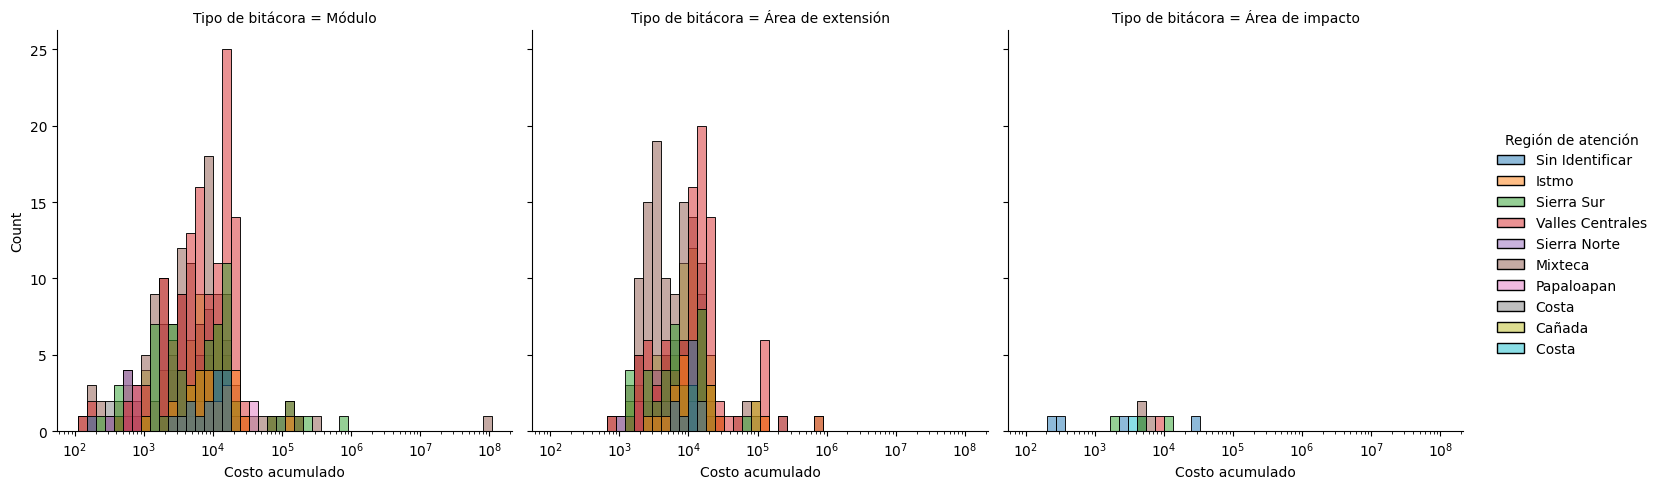

In [33]:
sns.displot(df,x='Costo acumulado',col='Tipo de bitácora',hue='Región de atención',log_scale=True)

In [34]:
import numpy as np

In [35]:
df.groupby(['Programa','Cultivo 1'])['Costo acumulado'].aggregate([np.mean,np.median,np.std])

/tmp/ipykernel_10729/1426776033.py:1: FutureWarning: The provided callable <function mean at 0x7efdaf25cdc0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['Programa','Cultivo 1'])['Costo acumulado'].aggregate([np.mean,np.median,np.std])
/tmp/ipykernel_10729/1426776033.py:1: FutureWarning: The provided callable <function median at 0x7efdac3281f0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby(['Programa','Cultivo 1'])['Costo acumulado'].aggregate([np.mean,np.median,np.std])
/tmp/ipykernel_10729/1426776033.py:1: FutureWarning: The provided callable <function std at 0x7efdaf25cee0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current be

mean       median  \
Programa                    Cultivo 1                                
Abasto Seguro de Maíz       FRIJOL       11642.125005  11514.00000   
                            MAIZ        378348.079766  10579.99998   
                            OTRO          1260.000000   1260.00000   
Autosuficiencia Alimentaria FRIJOL        9781.697368   4650.00000   
                            MAIZ         13861.269146   5300.00000   
Sin Identificar             CALABACITA    2790.000000   2790.00000   
                            MAIZ         11978.473686   9890.00000   

                                                 std  
Programa                    Cultivo 1                 
Abasto Seguro de Maíz       FRIJOL      7.981126e+03  
                            MAIZ        6.234662e+06  
                            OTRO                 NaN  
Autosuficiencia Alimentaria FRIJOL      1.726295e+04  
                            MAIZ        4.797564e+04  
Sin Identificar             CALABACITA           NaN  
                            MAIZ        1.543709e+04

In [36]:
df['unos'] = 1

In [37]:
df.groupby(['Programa','Cultivo 1'])[['unos']].sum().sort_values(by=['Programa','unos'],ascending=False)

unos
Programa                    Cultivo 1       
Sin Identificar             MAIZ          38
                            CALABACITA     1
Autosuficiencia Alimentaria MAIZ         569
                            FRIJOL        19
Abasto Seguro de Maíz       MAIZ         300
                            FRIJOL         4
                            OTRO           1

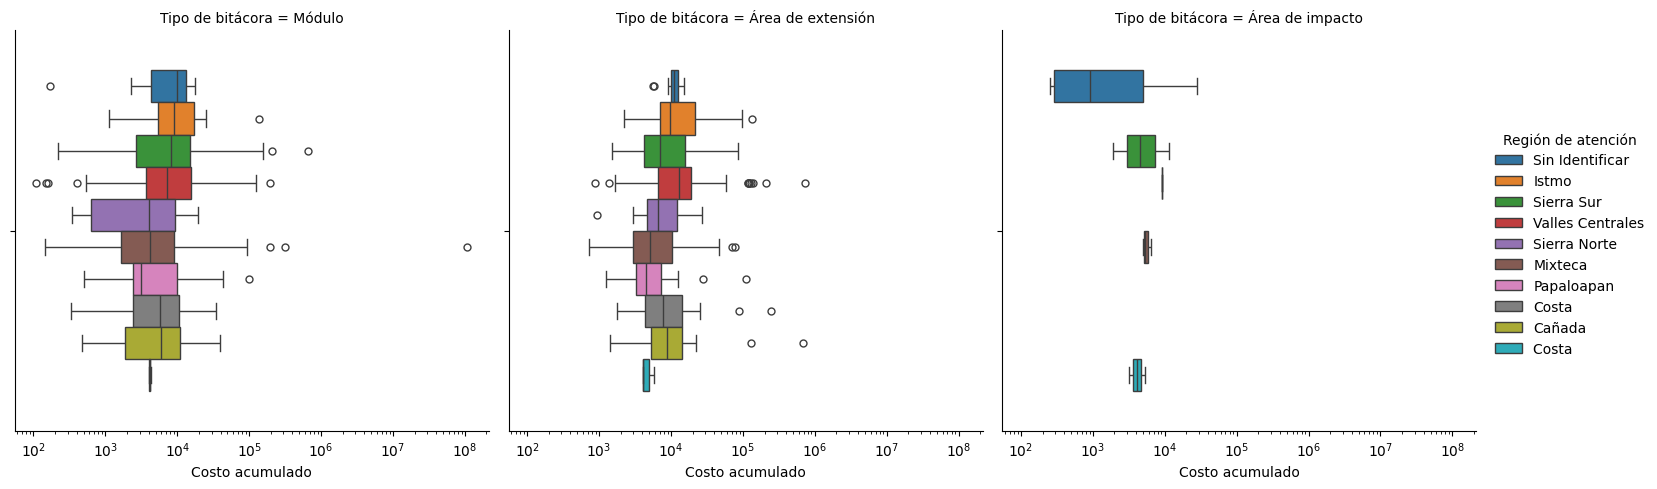

In [38]:
sns.catplot(df,kind='box',x='Costo acumulado',col='Tipo de bitácora',hue='Región de atención',log_scale=True)

In [39]:
df.shape

(933, 42)

In [40]:
df = df[df['Superficie sembrada (ha)'].notnull()]

In [41]:
df.shape

(851, 42)

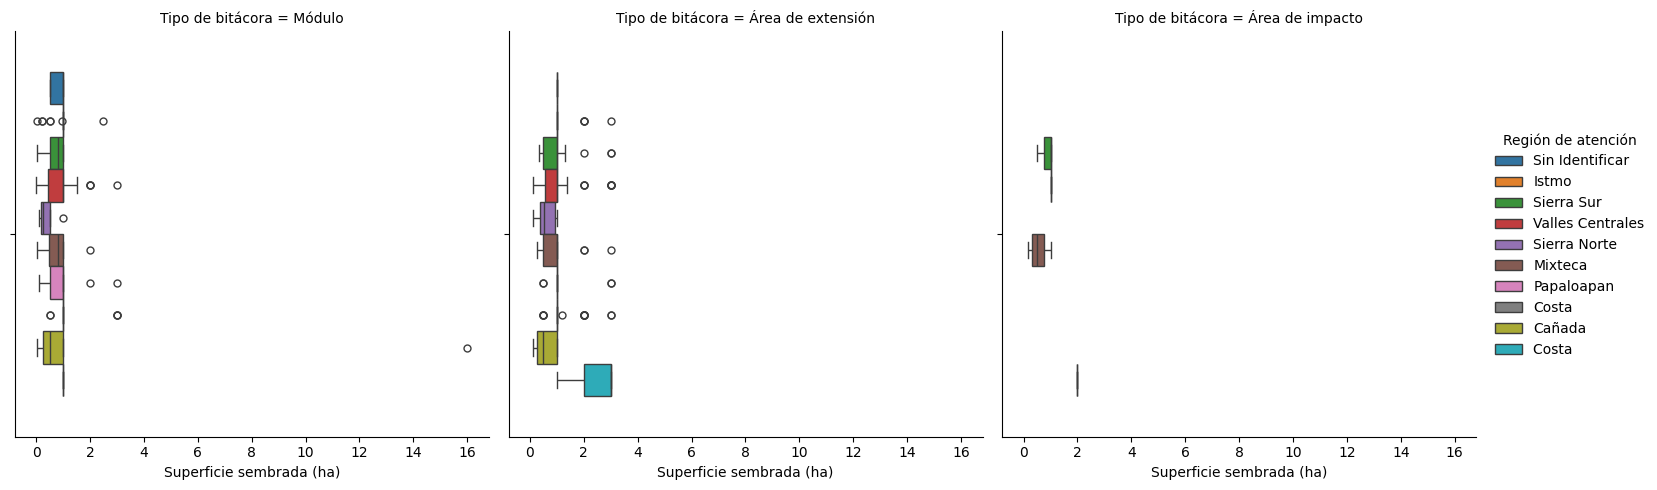

In [42]:
sns.catplot(df,kind='box',x='Superficie sembrada (ha)',col='Tipo de bitácora',hue='Región de atención')

In [43]:
df['Superficie sembrada (ha)'].describe()

count    851.000000
mean       0.876627
std        0.719586
min        0.010000
25%        0.500000
50%        1.000000
75%        1.000000
max       16.000000
Name: Superficie sembrada (ha), dtype: float64

In [44]:
df = df[df['Costo acumulado']>0]

In [45]:
df.shape

(851, 42)

In [46]:
df['cumulative_cost_ha'] = df['Costo acumulado'] / df['Superficie sembrada (ha)']

In [47]:
df['cumulative_cost_ha'].describe()

count    8.510000e+02
mean     1.548764e+05
std      3.702563e+06
min      7.315625e+01
25%      4.750000e+03
50%      9.630000e+03
75%      2.004679e+04
max      1.080027e+08
Name: cumulative_cost_ha, dtype: float64

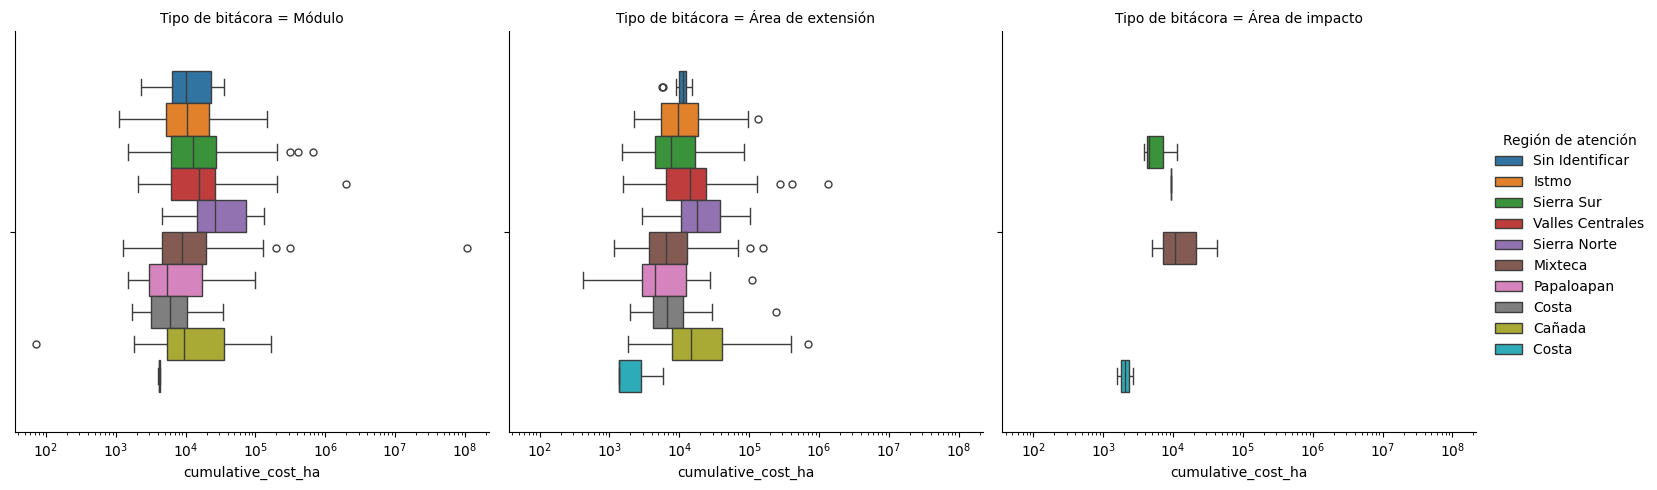

In [48]:
sns.catplot(df,kind='box',x='cumulative_cost_ha',col='Tipo de bitácora',hue='Región de atención',log_scale=True)

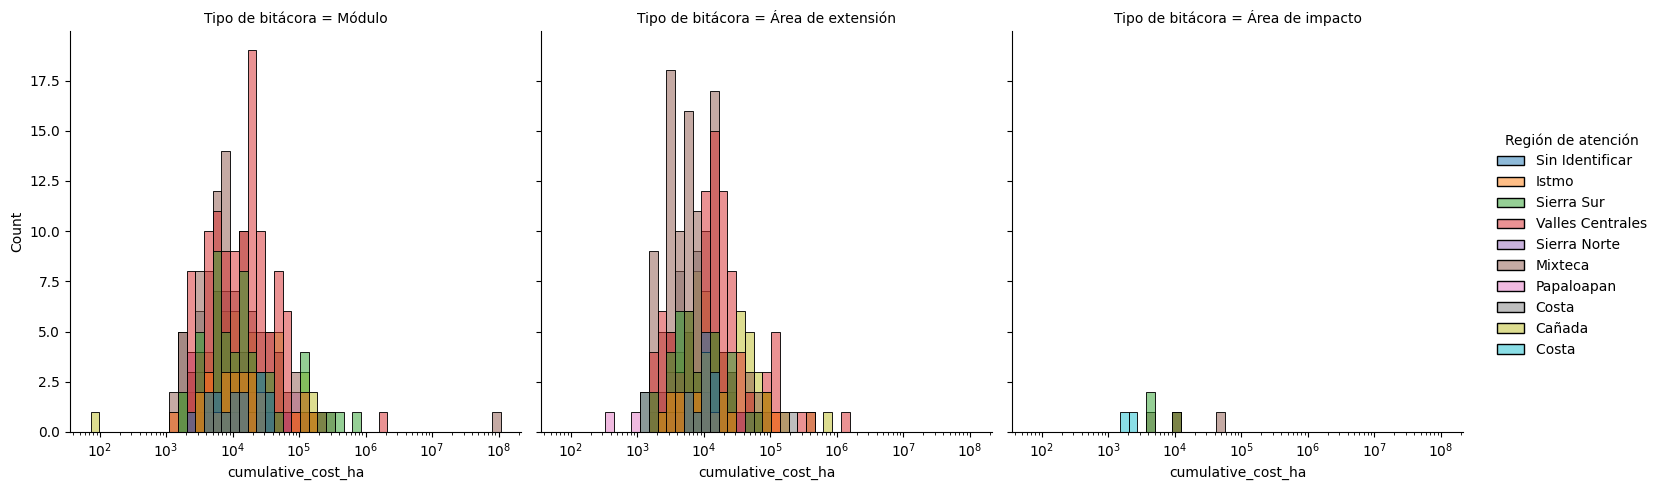

In [49]:
sns.displot(df,x='cumulative_cost_ha',col='Tipo de bitácora',hue='Región de atención',log_scale=True)

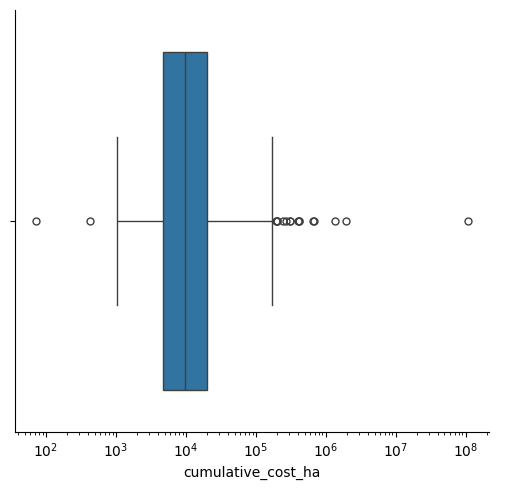

In [50]:
sns.catplot(df,kind='box',x='cumulative_cost_ha',log_scale=True)

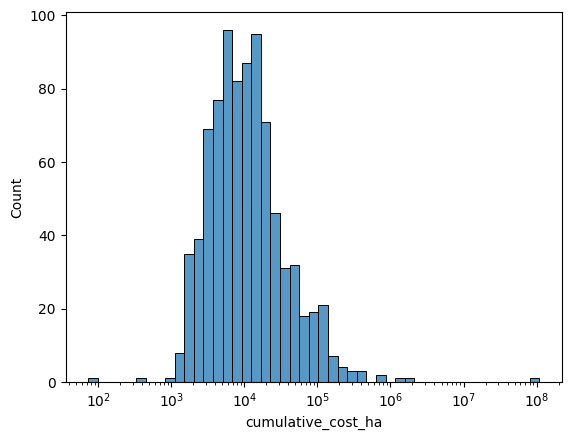

In [51]:
sns.histplot(df,x='cumulative_cost_ha',log_scale=True);

In [52]:
def eliminar_outliers_3sigma(data, columna=None):

    if isinstance(data, pd.DataFrame):
        if columna is None:
            raise ValueError("Se debe especificar una columna si se pasa un DataFrame.")
        valores = data[columna]
    else:
        valores = np.array(data)
    
    media = np.mean(valores)
    desviacion = np.std(valores)

    limite_inferior = media - 3 * desviacion
    limite_superior = media + 3 * desviacion
    
    if isinstance(data, pd.DataFrame):
        return data[(valores >= limite_inferior) & (valores <= limite_superior)]
    else:
        return valores[(valores >= limite_inferior) & (valores <= limite_superior)]

In [53]:
df=eliminar_outliers_3sigma(df,'cumulative_cost_ha')

In [54]:
df.shape
#851

(850, 43)

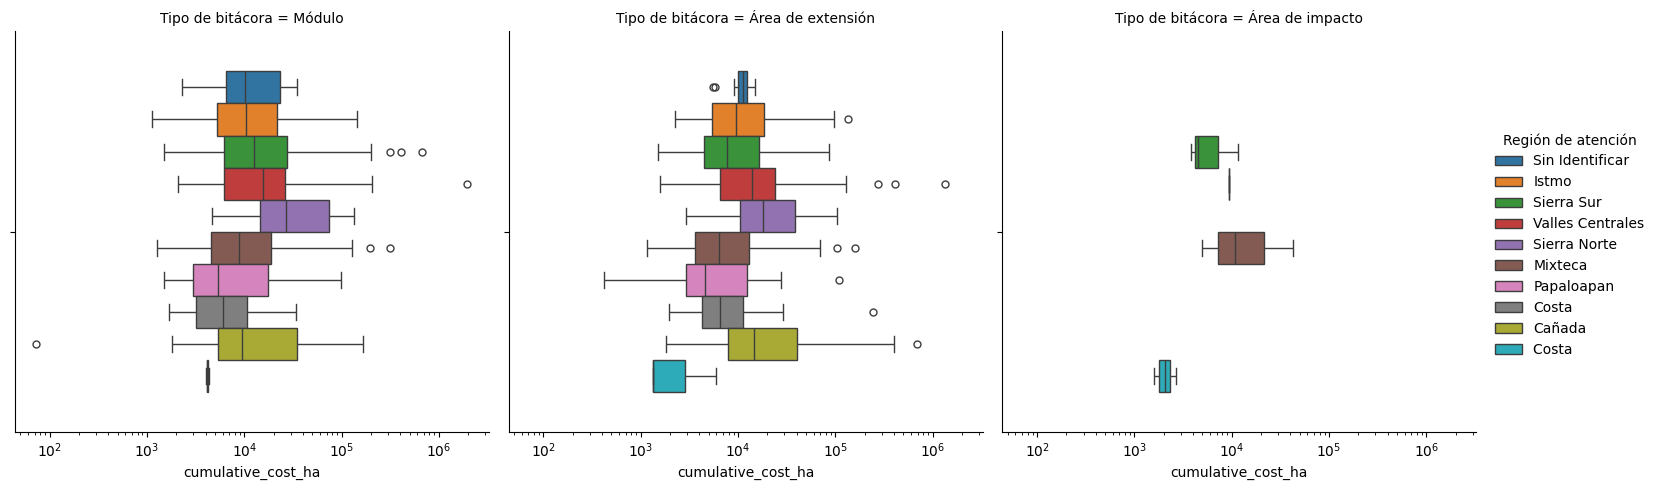

In [55]:
sns.catplot(df,kind='box',x='cumulative_cost_ha',col='Tipo de bitácora',hue='Región de atención',log_scale=True);

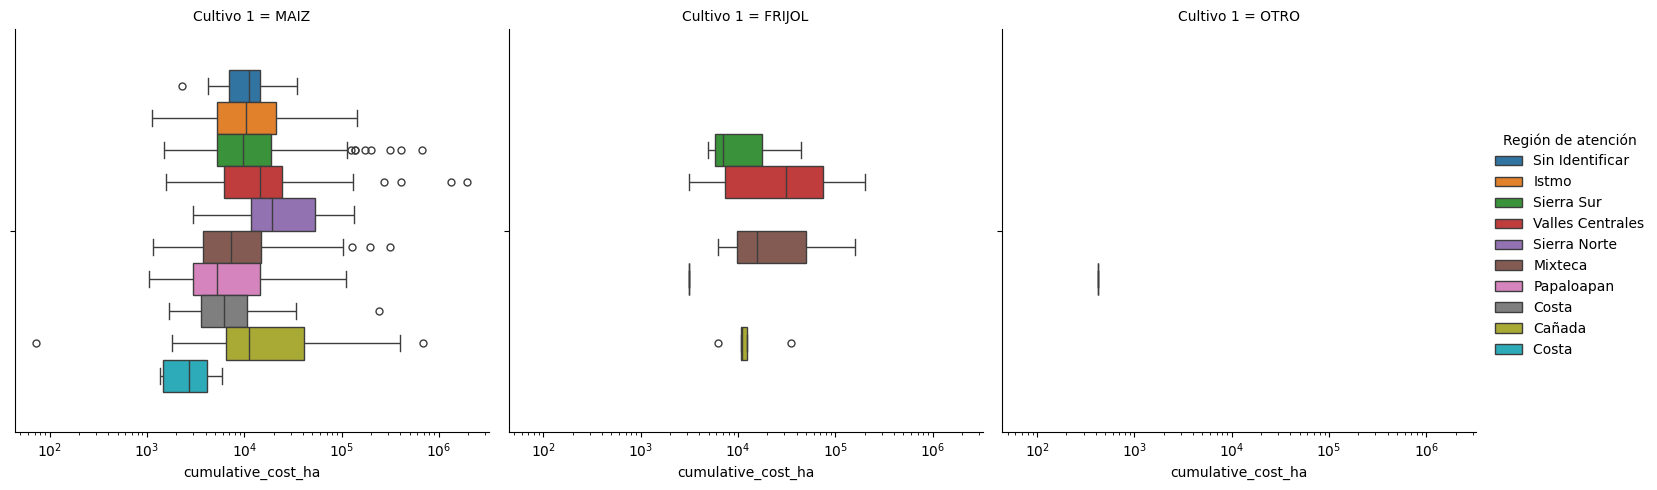

In [56]:
sns.catplot(df,kind='box',x='cumulative_cost_ha',col='Cultivo 1',hue='Región de atención',log_scale=True);

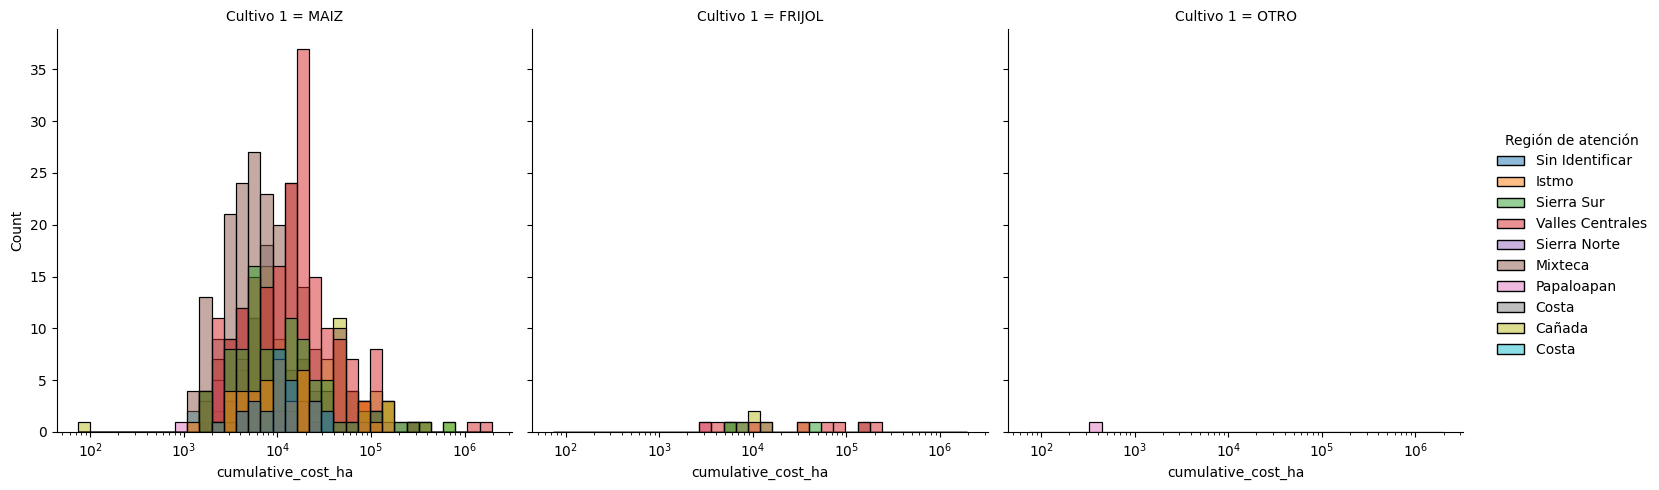

In [57]:
sns.displot(df,x='cumulative_cost_ha',col='Cultivo 1',hue='Región de atención',log_scale=True);

In [58]:
df['Región de atención'].value_counts()

Región de atención
Mixteca             213
Valles Centrales    207
Cañada              105
Sierra Sur           99
Costa                88
Istmo                45
Papaloapan           41
Sin Identificar      26
Sierra Norte         19
Costa                 7
Name: count, dtype: int64

In [59]:
df['Región de atención'].replace({'Costa ':'Costa'},inplace=True)

/tmp/ipykernel_10729/523655775.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Región de atención'].replace({'Costa ':'Costa'},inplace=True)
/tmp/ipykernel_10729/523655775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Región de atención'].replace({'Costa ':'Costa'},inplace=True)


In [60]:
df['Región de atención'].value_counts()

Región de atención
Mixteca             213
Valles Centrales    207
Cañada              105
Sierra Sur           99
Costa                95
Istmo                45
Papaloapan           41
Sin Identificar      26
Sierra Norte         19
Name: count, dtype: int64

In [61]:
df.groupby(['Programa','Región de atención','Cultivo 1'])['cumulative_cost_ha'].aggregate([np.mean,np.median,np.std]).reset_index()

/tmp/ipykernel_10729/2515519975.py:1: FutureWarning: The provided callable <function mean at 0x7efdaf25cdc0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['Programa','Región de atención','Cultivo 1'])['cumulative_cost_ha'].aggregate([np.mean,np.median,np.std]).reset_index()
/tmp/ipykernel_10729/2515519975.py:1: FutureWarning: The provided callable <function median at 0x7efdac3281f0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby(['Programa','Región de atención','Cultivo 1'])['cumulative_cost_ha'].aggregate([np.mean,np.median,np.std]).reset_index()
/tmp/ipykernel_10729/2515519975.py:1: FutureWarning: The provided callable <function std at 0x7efdaf25cee0> is currently using SeriesGroupBy.std. In a future versio

,Programa,Región de atención,Cultivo 1,mean,median,std
0,Abasto Seguro de Maíz,Costa,MAIZ,7868.625000,5825.000000,6898.033665
1,Abasto Seguro de Maíz,Istmo,MAIZ,23420.921053,13767.500000,35613.417321
2,Abasto Seguro de Maíz,Mixteca,MAIZ,16126.270837,7717.999995,32670.950366
3,Abasto Seguro de Maíz,Papaloapan,MAIZ,11253.873329,4180.000000,22263.343590
4,Abasto Seguro de Maíz,Papaloapan,OTRO,420.000000,420.000000,NaN
5,Abasto Seguro de Maíz,Sierra Sur,MAIZ,26615.836111,17618.750000,36357.587998
6,Abasto Seguro de Maíz,Valles Centrales,FRIJOL,116421.250050,115140.000000,79811.263728
7,Abasto Seguro de Maíz,Valles Centrales,MAIZ,35798.299946,17217.000030,111276.219345
8,Autosuficiencia Alimentaria,Cañada,FRIJOL,14990.900000,10923.000000,11273.039000
9,Autosuficiencia Alimentaria,Cañada,MAIZ,38717.214538,11249.375000,83619.968175


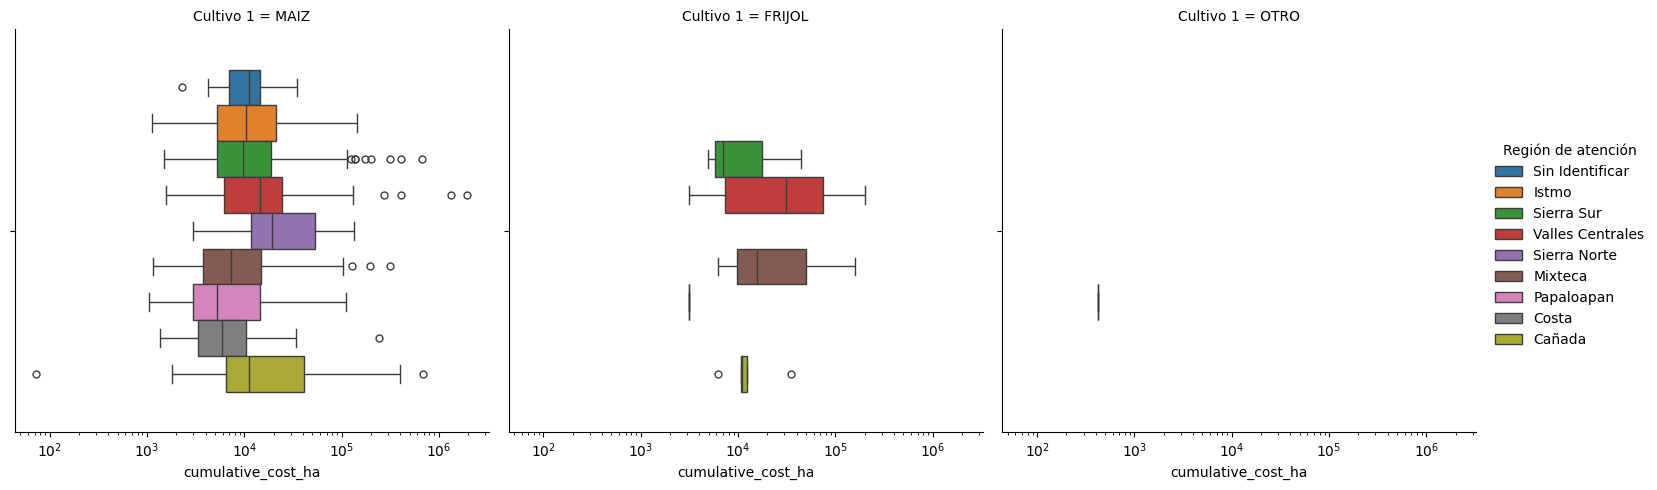

In [62]:
sns.catplot(df,kind='box',x='cumulative_cost_ha',col='Cultivo 1',hue='Región de atención',log_scale=True);

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 850 entries, 0 to 932
Data columns (total 43 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Bitácora registrada por                         850 non-null    object 
 1   NomUsuario                                      850 non-null    object 
 2   ID_Bitacora                                     850 non-null    object 
 3   Fecha de creación (bitácora)                    850 non-null    object 
 4   Tipo de bitácora                                850 non-null    object 
 5   Año-ciclo-bitácora                              850 non-null    object 
 6   Régimen hídrico                                 850 non-null    object 
 7   Id_Cultivos                                     850 non-null    object 
 8   Tipo de superficie                              850 non-null    object 
 9   Cultivo 1                                       

In [64]:
df.columns

Index(['Bitácora registrada por', 'NomUsuario', 'ID_Bitacora',
       'Fecha de creación (bitácora)', 'Tipo de bitácora',
       'Año-ciclo-bitácora', 'Régimen hídrico', 'Id_Cultivos',
       'Tipo de superficie', 'Cultivo 1', 'Cultivo 2', 'Cultivo 3',
       'Superficie sembrada (ha)', '02_Costo semilla', '04_Análisis de suelo',
       '05_Análisis de agua', '06_Nivelación', '07_Curvas de nivel',
       '08_Conservación de suelo y agua', '09_Aplicación de insumos',
       '10_Preparación mecánica del suelo', '11_Siembra',
       '12_Control  físico de malezas', '13_Riego', '¿Obtuvo cosecha?',
       '14_Cosecha manual', '14_Cosecha motorizada',
       '16_Costos comercialización', '18_Gastos indirectos',
       '19_Labores culturales', 'Costo acumulado', 'Ingresos_totales',
       'ID_Productividad', 'C1P1-¿Cuántos productos cosecho del cultivo 1?',
       'Tipo de semilla C1', 'C1P2-Producto obtenido',
       'C1P2-Rendimiento real (Unidad/ha)', 'C1P2-Unidad de medida',
       'Bitac

In [65]:
df.drop(columns=['Fecha de creación (bitácora)','Id_Cultivos','Cultivo 2', 'Cultivo 3', 'ID_Productividad', 'Bitacora.registrada.por','unos'],inplace=True)

/tmp/ipykernel_10729/273038476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Fecha de creación (bitácora)','Id_Cultivos','Cultivo 2', 'Cultivo 3', 'ID_Productividad', 'Bitacora.registrada.por','unos'],inplace=True)


In [66]:
def clean_names_prefix(list_columns:list) -> list:
    new_names = []
    for col in list_columns:
        split_str = col.split('_')
        output = '_'.join(split_str[1:])
        new_names.append(output)
    return new_names

In [67]:
cols_costo=['02_Costo semilla', '04_Análisis de suelo',
       '05_Análisis de agua', '06_Nivelación', '07_Curvas de nivel',
       '08_Conservación de suelo y agua', '09_Aplicación de insumos',
       '10_Preparación mecánica del suelo', '11_Siembra',
       '12_Control  físico de malezas', '13_Riego',
       '14_Cosecha manual', '14_Cosecha motorizada',
       '16_Costos comercialización', '18_Gastos indirectos',
       '19_Labores culturales']

In [68]:
names_cost = clean_names_prefix(cols_costo)

In [69]:
names_cost

['Costo semilla',
 'Análisis de suelo',
 'Análisis de agua',
 'Nivelación',
 'Curvas de nivel',
 'Conservación de suelo y agua',
 'Aplicación de insumos',
 'Preparación mecánica del suelo',
 'Siembra',
 'Control  físico de malezas',
 'Riego',
 'Cosecha manual',
 'Cosecha motorizada',
 'Costos comercialización',
 'Gastos indirectos',
 'Labores culturales']

In [70]:
df.rename(columns=dict(zip(cols_costo,names_cost)),inplace=True)

/tmp/ipykernel_10729/3419667337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=dict(zip(cols_costo,names_cost)),inplace=True)


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 850 entries, 0 to 932
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Bitácora registrada por                         850 non-null    object 
 1   NomUsuario                                      850 non-null    object 
 2   ID_Bitacora                                     850 non-null    object 
 3   Tipo de bitácora                                850 non-null    object 
 4   Año-ciclo-bitácora                              850 non-null    object 
 5   Régimen hídrico                                 850 non-null    object 
 6   Tipo de superficie                              850 non-null    object 
 7   Cultivo 1                                       850 non-null    object 
 8   Superficie sembrada (ha)                        850 non-null    float64
 9   Costo semilla                                   

In [72]:
list(df.columns)

['Bitácora registrada por',
 'NomUsuario',
 'ID_Bitacora',
 'Tipo de bitácora',
 'Año-ciclo-bitácora',
 'Régimen hídrico',
 'Tipo de superficie',
 'Cultivo 1',
 'Superficie sembrada (ha)',
 'Costo semilla',
 'Análisis de suelo',
 'Análisis de agua',
 'Nivelación',
 'Curvas de nivel',
 'Conservación de suelo y agua',
 'Aplicación de insumos',
 'Preparación mecánica del suelo',
 'Siembra',
 'Control  físico de malezas',
 'Riego',
 '¿Obtuvo cosecha?',
 'Cosecha manual',
 'Cosecha motorizada',
 'Costos comercialización',
 'Gastos indirectos',
 'Labores culturales',
 'Costo acumulado',
 'Ingresos_totales',
 'C1P1-¿Cuántos productos cosecho del cultivo 1?',
 'Tipo de semilla C1',
 'C1P2-Producto obtenido',
 'C1P2-Rendimiento real (Unidad/ha)',
 'C1P2-Unidad de medida',
 'Región de atención',
 'Programa',
 'cumulative_cost_ha']

In [73]:
df.rename(columns={'Año-ciclo-bitácora':'Ciclo','Región de atención':'Region',
                    'Cultivo 1':'Cultivo','Bitácora registrada por':'nombre_tec'},inplace=True)

/tmp/ipykernel_10729/1878929802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Año-ciclo-bitácora':'Ciclo','Región de atención':'Region',


In [74]:
df.to_csv('../data/impacto_cost_nov.csv')